# Overview

The growth of e-commerce has been one of the most significant trends in business over the past decade. Advances in mobile technology, logistics, and delivery has contributed to this explosion in growth. Product reviews are an essential component of e-commerce, and they play a significant role in shaping consumer behavior. There are now many platforms ranging from social media to online marketplaces that allow customers to easily provide feedback for products. Companies can use sentiment classification to analyze customer feedback and identify areas where customers are dissatisfied or delighted with their products or services. This can help businesses improve their products and customer service, and ultimately increase customer satisfaction and loyalty.

# Buisness Problem

Product reviews can provide businesses with a better understanding of customer feedback and preferences. By analyzing product reviews, businesses can gain insights into what customers like and dislike about their products, identify areas for improvement, and develop strategies to enhance customer satisfaction and loyalty.


# Methodology

Due to the massive amounts of reviews avaliable, it is too time consuming to examine each and every data. Topic modeling and sentiment analysis are two powerful techniques used in natural language processing and machine learning to analyze text data and gain insights into customer feedback and preferences.

Topic modeling will be used to automatically identify the key topics and themes in product reviews. This helps businesses gain a better understanding of their customers' needs and preferences by uncovering hidden patterns and insights.

Sentiment analysis will be used to determine the overall sentiment of product reviews, identifing whether the sentiment is positive or negative. This can provide businesses with valuable insights into customer satisfaction and loyalty.

Together, these techniques can help businesses to analyze large volumes of customer feedback, identify key themes and topics, and determine the overall sentiment of that feedback.

# Data Understanding

Data for this project was obtained from https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/ which includes a large-scale collection of customer reviews of products sold on Amazon.Each review includes the review text, as well as additional metadata such as the product ID, reviewer ID, rating, and helpfulness votes.

Original dataset contained around 6.7 million reviews of products from the electronics category. For the purpose of this project i have subsetted dataset to include only headphone and earphone products with 500 or more reviews. Resulting in a collection of 108,859 reviews from June, 2000 to September 2018. 

# Data Preperation

In [1]:
# Importing neccesary libraries
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import gzip
from nltk import word_tokenize

from nltk.sentiment import SentimentIntensityAnalyzer

import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


from sklearn.feature_extraction.text import CountVectorizer

import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases, Phraser

from gensim.models.ldamulticore import LdaMulticore
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

# Data Exploration

## EDA

In [3]:
df = pd.read_csv('data/headphone_reviews.csv')

C:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,15,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,NaN,True,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,Great headphones. It's just the cord is too sh...,Five Stars,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
1,5.0,NaN,True,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,Really like these headphone. Wanted something...,Officewear,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
2,1.0,NaN,True,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,Wire to headphone broke off in less than a mon...,For the money they are fine. Just hope they ho...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
3,3.0,NaN,True,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,Very good,Three Stars,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
4,1.0,NaN,True,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,Currently returning this product because the s...,Currently returning this product because the s...,...,['Adjustable headband allows you to create a c...,"['>#316,475 in Cell Phones & Accessories (See ...","['B019PO1ZRI', 'B00W87LKXE', 'B019PO1ZNC', 'B0...",Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$7.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471228 entries, 0 to 471227
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          471228 non-null  float64
 1   vote             65135 non-null   object 
 2   verified         471228 non-null  bool   
 3   reviewTime       471228 non-null  object 
 4   reviewerID       471228 non-null  object 
 5   asin             471228 non-null  object 
 6   style            294015 non-null  object 
 7   reviewerName     471143 non-null  object 
 8   reviewText       471167 non-null  object 
 9   summary          471147 non-null  object 
 10  unixReviewTime   471228 non-null  int64  
 11  image            9026 non-null    object 
 12  category         471228 non-null  object 
 13  tech1            24660 non-null   object 
 14  description      471228 non-null  object 
 15  fit              22 non-null      object 
 16  title            471228 non-null  obje

In [6]:
# Checking for duplicate rows
df.astype(str).duplicated().sum()

36841

In [7]:
# Dropping duplicates
df = df.loc[df.astype(str).drop_duplicates().index]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434387 entries, 0 to 471227
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          434387 non-null  float64
 1   vote             58949 non-null   object 
 2   verified         434387 non-null  bool   
 3   reviewTime       434387 non-null  object 
 4   reviewerID       434387 non-null  object 
 5   asin             434387 non-null  object 
 6   style            268880 non-null  object 
 7   reviewerName     434312 non-null  object 
 8   reviewText       434328 non-null  object 
 9   summary          434307 non-null  object 
 10  unixReviewTime   434387 non-null  int64  
 11  image            8803 non-null    object 
 12  category         434387 non-null  object 
 13  tech1            24192 non-null   object 
 14  description      434387 non-null  object 
 15  fit              22 non-null      object 
 16  title            434387 non-null  obje

In [9]:
# Checking for null values, focusing on reviewText
df.isna().sum()

overall                 0
vote               375438
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              165507
reviewerName           75
reviewText             59
summary                80
unixReviewTime          0
image              425584
category                0
tech1              410195
description             0
fit                434365
title                   0
also_buy                0
tech2              432645
brand                 356
feature                 0
rank                    0
also_view               0
main_cat               73
similar_item       106986
date               141836
price              177433
imageURL                0
imageURLHighRes         0
details                49
dtype: int64

In [10]:
# Dropping rows with null values in reviewText
df.dropna(subset = ['reviewText'], inplace = True)

In [11]:
df.isna().sum()

overall                 0
vote               375385
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              165480
reviewerName           75
reviewText              0
summary                79
unixReviewTime          0
image              425538
category                0
tech1              410141
description             0
fit                434306
title                   0
also_buy                0
tech2              432586
brand                 356
feature                 0
rank                    0
also_view               0
main_cat               73
similar_item       106970
date               141815
price              177403
imageURL                0
imageURLHighRes         0
details                49
dtype: int64

In [12]:
# Resetting index
df = df.reset_index(drop = True)

In [13]:
# Dropping other features with many null values. Also drop features that may not be needed.
to_drop = ['vote', 'style', 'image', 'tech1', 'fit', 'tech2', 'similar_item', 'date', 
           'price', 'reviewerID', 'reviewerName', 'unixReviewTime', 'category', 'rank', 
           'main_cat', 'imageURL', 'imageURLHighRes', 'details']
df = df.drop(columns = to_drop)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434328 entries, 0 to 434327
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   overall      434328 non-null  float64
 1   verified     434328 non-null  bool   
 2   reviewTime   434328 non-null  object 
 3   asin         434328 non-null  object 
 4   reviewText   434328 non-null  object 
 5   summary      434249 non-null  object 
 6   description  434328 non-null  object 
 7   title        434328 non-null  object 
 8   also_buy     434328 non-null  object 
 9   brand        433972 non-null  object 
 10  feature      434328 non-null  object 
 11  also_view    434328 non-null  object 
dtypes: bool(1), float64(1), object(10)
memory usage: 36.9+ MB


In [15]:
counts = df['asin'].value_counts()

In [16]:
df = df[df['asin'].isin(counts[counts > 200].index)]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189482 entries, 451 to 430674
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   overall      189482 non-null  float64
 1   verified     189482 non-null  bool   
 2   reviewTime   189482 non-null  object 
 3   asin         189482 non-null  object 
 4   reviewText   189482 non-null  object 
 5   summary      189446 non-null  object 
 6   description  189482 non-null  object 
 7   title        189482 non-null  object 
 8   also_buy     189482 non-null  object 
 9   brand        189482 non-null  object 
 10  feature      189482 non-null  object 
 11  also_view    189482 non-null  object 
dtypes: bool(1), float64(1), object(10)
memory usage: 17.5+ MB


In [18]:
df = df.reset_index(drop = True)

In [19]:
# Distribution of star ratings
df.overall.value_counts(normalize = True)

5.0    0.595386
4.0    0.190778
3.0    0.093159
1.0    0.062961
2.0    0.057715
Name: overall, dtype: float64

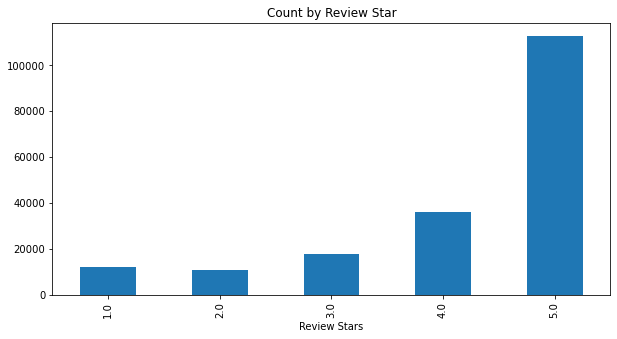

In [20]:
ax = df.overall.value_counts().sort_index().plot(kind = 'bar',
                                            title = 'Count by Review Star',
                                            figsize = (10,5))
ax.set_xlabel('Review Stars');


Majority of product reviews are 5 star, around 60%. This will be an imbalanced dataset for classification.

In [21]:
# Examining date range of reviews
df.reviewTime = pd.to_datetime(df.reviewTime)
print(df.reviewTime.min())
print(df.reviewTime.max())

2000-06-29 00:00:00
2018-10-01 00:00:00


In [22]:
df.asin.value_counts().count()

395

In [23]:
df.brand.value_counts().count()

169

Dataset contains a total of 395 unique products and 169 unique brands

In [24]:
df.verified.value_counts(normalize = True)

True     0.891399
False    0.108601
Name: verified, dtype: float64

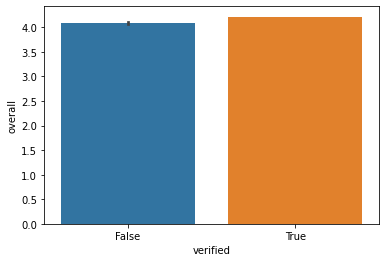

In [25]:
sns.barplot(data = df, x = 'verified', y = 'overall');

Majority or reviews have been verified purchases. No major difference between average star rating of verified vs non verified purchase reviews.

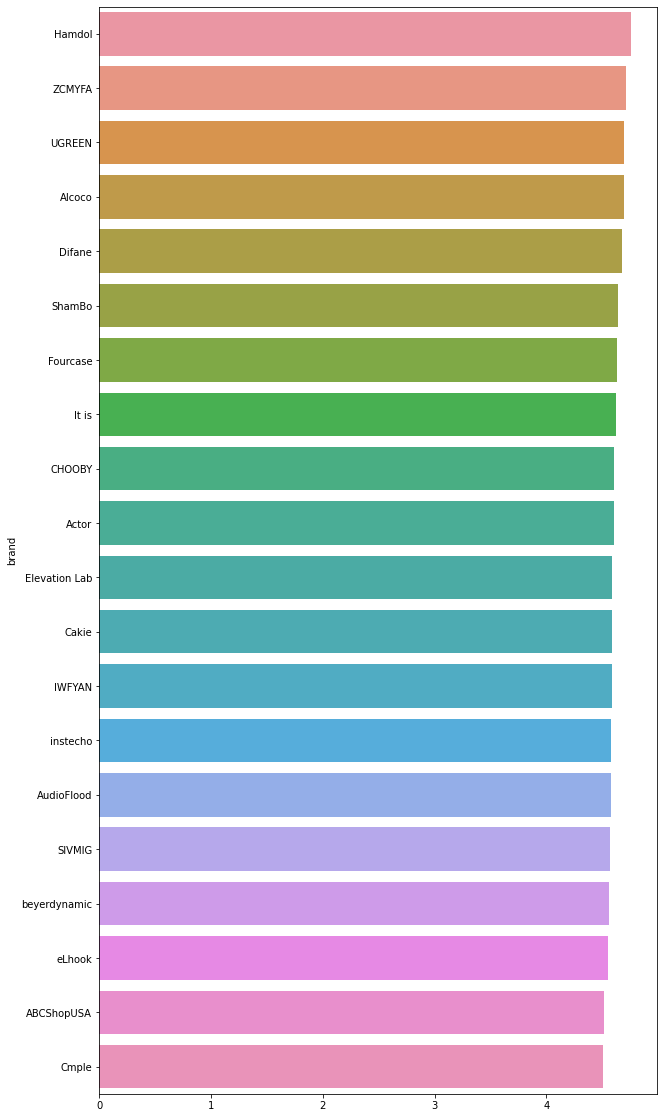

In [26]:
# Top 20 brands by overall star rating
dfg = df.groupby('brand')['overall'].mean().sort_values(ascending = False).head(20)
fig, ax = plt.subplots(figsize = (10,20))
ax = sns.barplot(x = dfg.values, y = dfg.index, orient = 'h')

## Sentiment Validation of Star Ratings

In order to reduce this problem to a binary classification. I will ultilize NLTK's VADER library, which is designed to provide a sentiment intensity score for a given text, to validate positive sentiment with high ratings and negative sentiment with low ratings. Vader uses a lexicon-based approach, where it matches words and phrases in the text to a pre-defined set of positive and negative words, along with intensifiers and negators.

In [27]:
# initialize SIA
sia = SentimentIntensityAnalyzer()

In [28]:
# Example text
df.reviewText[0]

'Get the SportaPros instead.  They look better, can be worn in a street configuration, cost less, and sound exactly the same.'

In [29]:
# Example rating
df.overall[0]

4.0

In [30]:
# Obtain polarity score of text
sia.polarity_scores(df.reviewText[0])

{'neg': 0.095, 'neu': 0.779, 'pos': 0.126, 'compound': 0.1779}

Vader provides measures of sentiment polarity (positive, negative, or neutral on a scale of 0 to 1) and intensity (how strongly positive or negative the sentiment is on the scale of -1 to 1). 

In [31]:
sent_val_df = df.copy()

In [32]:
# Adding in values from VADER to dataframe
sent_val_df['compound'] = [sia.polarity_scores(str(x))['compound'] for x in df['reviewText']]
sent_val_df['neg'] = [sia.polarity_scores(str(x))['neg'] for x in df['reviewText']]
sent_val_df['neu'] = [sia.polarity_scores(str(x))['neu'] for x in df['reviewText']]
sent_val_df['pos'] = [sia.polarity_scores(str(x))['pos'] for x in df['reviewText']]

In [33]:
sent_val_df.head()

,overall,verified,reviewTime,asin,reviewText,summary,description,title,also_buy,brand,feature,also_view,compound,neg,neu,pos
0,4.0,False,2000-07-12,B00001P4ZH,"Get the SportaPros instead. They look better,...",Get the SportaPros Instead.,['Dynamic element design for deep bass perform...,"koss porta pro on ear headphones with case, bl...","['B000O2KIMO', 'B071XYY2Q5', 'B0006B486K', 'B0...",Koss,"['Designed for deep bass performance', 'Comfor...",[],0.1779,0.095,0.779,0.126
1,5.0,False,2018-04-26,B00001P4ZH,I've been looking for a lighter alternative to...,Perfect,['Dynamic element design for deep bass perform...,"koss porta pro on ear headphones with case, bl...","['B000O2KIMO', 'B071XYY2Q5', 'B0006B486K', 'B0...",Koss,"['Designed for deep bass performance', 'Comfor...",[],0.9905,0.037,0.778,0.185
2,5.0,False,2018-04-22,B00001P4ZH,The finest headphones available. You can spend...,"You will just love portapro, we all do.",['Dynamic element design for deep bass perform...,"koss porta pro on ear headphones with case, bl...","['B000O2KIMO', 'B071XYY2Q5', 'B0006B486K', 'B0...",Koss,"['Designed for deep bass performance', 'Comfor...",[],0.9822,0.030,0.715,0.256
3,5.0,True,2018-04-13,B00001P4ZH,3rd pair of these I've purchased. My wife has...,Great sounding Koss Headphones,['Dynamic element design for deep bass perform...,"koss porta pro on ear headphones with case, bl...","['B000O2KIMO', 'B071XYY2Q5', 'B0006B486K', 'B0...",Koss,"['Designed for deep bass performance', 'Comfor...",[],0.9077,0.031,0.823,0.147
4,5.0,True,2018-04-09,B00001P4ZH,My old Koss Porta Pros finally got beat to dea...,Sound much better than they should!,['Dynamic element design for deep bass perform...,"koss porta pro on ear headphones with case, bl...","['B000O2KIMO', 'B071XYY2Q5', 'B0006B486K', 'B0...",Koss,"['Designed for deep bass performance', 'Comfor...",[],0.9729,0.050,0.758,0.192


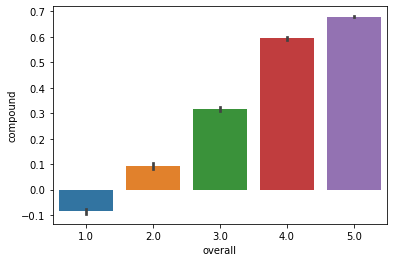

In [34]:
# Examining compund score vs star rating
ax = sns.barplot(data = sent_val_df, x = 'overall', y = 'compound')

Above graph shows as star ratings increase positive sentiment also increases.

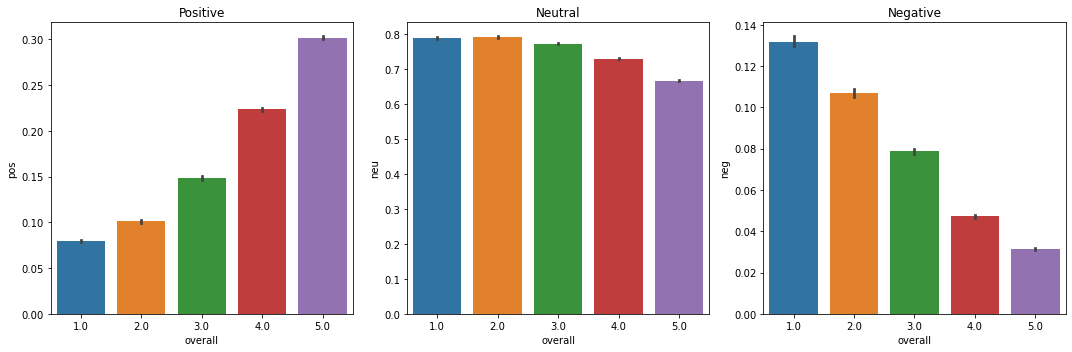

In [35]:
# Examine the positive, neutral, and negative scores vs star rating
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data = sent_val_df, x = 'overall', y = 'pos', ax = axs[0])
sns.barplot(data = sent_val_df, x = 'overall', y = 'neu', ax = axs[1])
sns.barplot(data = sent_val_df, x = 'overall', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
fig.tight_layout();

Positive sentiment score increases as star rating inscreases. Neutral score is relatively flat across star ratings. Negative score decreases as star rating increases. This confirms the connection between sentiment and star rating of reviews.

In [36]:
# Function to label star ratings above 3 to positive and ratings 3 or less to negative
def label_encode(x):
    if x <= 3:
        return 0
    if x > 3:
        return 1

In [37]:
df["sentiment"] = df["overall"].apply(lambda x: label_encode(x))

In [38]:
df['sentiment'].value_counts(normalize = True)

1    0.786164
0    0.213836
Name: sentiment, dtype: float64

Around 79% of reviews is positive and 21% negative. 

## Text Analysis

The main feature I will be working with will be reviewText. Upon some exploration of this feature, there is a high number of short text reviews. In order to get more information to work with I will combine the reviewText and summary features together.

In [39]:
df.reviewText[100]

'Very good headphones.'

In [40]:
df.summary[100]

'Five Stars'

In [41]:
df.reviewText[100] + " " + df.summary[100]

'Very good headphones. Five Stars'

In [42]:
# declare summary as text so it will not clear reviewText when combining with the 20 null values found in summary.
df['reviews'] = df.reviewText + ' ' + df.summary.astype(str)

I will now create some features to help examine some statistics of the text data, such as amounts of words and characters in reviews.

In [43]:
text_stats_df = df[['reviews', 'sentiment']].copy()

In [44]:
text_stats_df.head()

,reviews,sentiment
0,"Get the SportaPros instead. They look better,...",1
1,I've been looking for a lighter alternative to...,1
2,The finest headphones available. You can spend...,1
3,3rd pair of these I've purchased. My wife has...,1
4,My old Koss Porta Pros finally got beat to dea...,1


In [45]:
# Create functions to count the amount of words and characters in a review
def word_count(text):
    return len(word_tokenize(text))

def char_count(text):
    text_without_spaces = text.replace(" ", "")
    return len(text_without_spaces)

In [46]:
text_stats_df['word_count'] = df.reviews.apply(lambda x: word_count(x))
text_stats_df['review_len'] = df.reviews.apply(lambda x: char_count(x))

In [47]:
text_stats_df.head()

,reviews,sentiment,word_count,review_len
0,"Get the SportaPros instead. They look better,...",1,31,127
1,I've been looking for a lighter alternative to...,1,263,1097
2,The finest headphones available. You can spend...,1,119,512
3,3rd pair of these I've purchased. My wife has...,1,108,419
4,My old Koss Porta Pros finally got beat to dea...,1,170,713


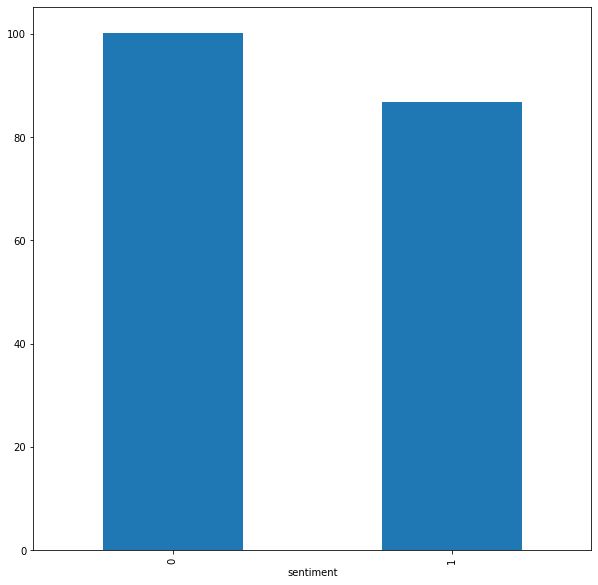

In [48]:
# Average word count of positive and negative reviews
text_stats_df.groupby('sentiment')['word_count'].mean().plot(kind = 'bar', figsize = (10,10));

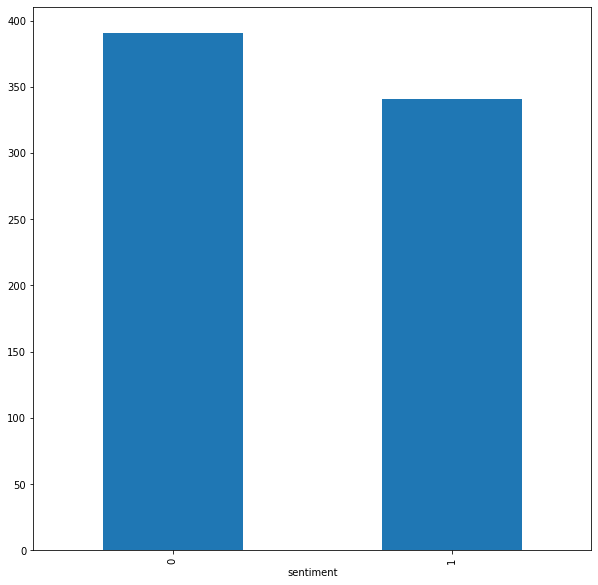

In [49]:
# Average review length of positive and negative reviews
text_stats_df.groupby('sentiment')['review_len'].mean().plot(kind = 'bar', figsize = (10,10));

Negative reviews tend to be slightly longer than positive reviews. This may explain that people are more descriptive when they feel negativley towards a product. The below correlation matrix confirms this, even though the correlation between word count, review length, and sentiment is small it is still negative.

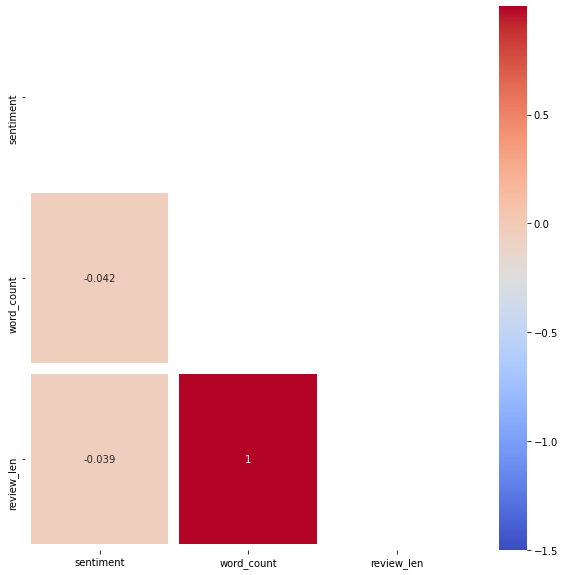

In [50]:
correlation = text_stats_df[['sentiment', 'word_count', 'review_len']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 10}, linewidths=10, vmin=-1.5, mask=mask);

In [51]:
text_stats_df.describe()

,sentiment,word_count,review_len
count,189482.000000,189482.000000,189482.000000
mean,0.786164,89.689163,351.412810
std,0.410013,131.407122,521.631066
min,0.000000,2.000000,4.000000
25%,1.000000,22.000000,86.000000
50%,1.000000,49.000000,192.000000
75%,1.000000,105.000000,410.000000
max,1.000000,4744.000000,19244.000000


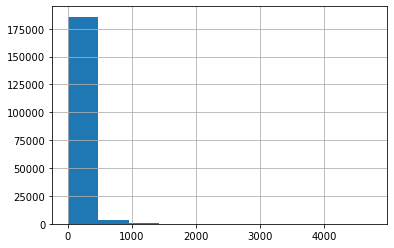

In [52]:
text_stats_df.word_count.hist();

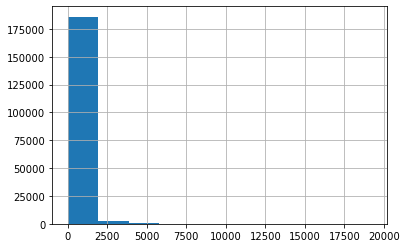

In [53]:
text_stats_df.review_len.hist();

Examining other statistics of word count and review length, I see most reviews are under 100 words and under around 400 characters.

In [54]:
text_stats_df.sort_values(by = 'word_count', ascending = False).head(20)

,reviews,sentiment,word_count,review_len
111300,UPDATE 12/12/15: Recently my Beats Studio Wire...,1,4744,19244
2772,If this is your first foray into high-end audi...,1,4014,16470
174311,"<div id=""video-block-R21WD3K0GDQSEG"" class=""a-...",1,3879,15043
97913,"Taking the Bose MIE2i, the most comfortable an...",1,3719,15626
169790,"Item arrived on time, well-packaged. Contained...",1,3256,12579
2854,I bought the HD600 refurbished from amazon.com...,1,3124,12914
134290,I've spent a long time in the following compar...,1,3043,11828
162588,I bought these headphones and they were my fir...,1,2991,13184
186975,Recently I went on search for noise cancellin...,1,2800,11228
111948,Compared the Audio Technica ANC7B's vs. Bose Q...,0,2786,10671


In [55]:
text_stats_df.sort_values(by = 'word_count', ascending = False).tail(20)

,reviews,sentiment,word_count,review_len
90444,Great Great,1,2,10
20214,Uncomfortable Uncomfortable,0,2,26
9199,works works,1,2,10
43149,Good Good,1,2,8
185135,great great,1,2,10
9282,A+ A+,1,2,4
90088,Thanks Thanks,1,2,12
90041,A1 A1,1,2,4
146848,Excellent Excellent,1,2,18
89995,Ok ok,1,2,4


### Text preprocessing

Examining some of the longest reviews, I can see that text the below steps are needed to clean text:

* Convert text to lowercase: This makes sure that the model does not treat the same word with different cases as different words.

* Remove punctuation: This step removes any special characters or punctuation marks that might not add much meaning to the text.

* Tokenize the text: Tokenization is the process of splitting the text into individual words or phrases. This is an important step as it allows us to analyze and manipulate individual words or phrases.

* Remove stop words: Stop words are commonly used words such as "the", "a", "an", "in", "and" that do not carry much meaning and can be removed.

* Remove numbers: If the numbers in the text do not add much value to the analysis, they can be removed.

* Stemming or Lemmatization: Stemming and Lemmatization are techniques used to reduce words to their root form so that variations of the same word can be treated as the same word.

* Remove HTML tags, URLs, line breaks, and extra spaces.

* Filter POS tags to include only nouns, verbs, adjectives, and adverbs.


In [56]:
# grab default stop words from spacy library
stop_words = nlp.Defaults.stop_words
len(stop_words)

326

In [57]:
def clean_text(text):
    # Replace &nbsp; with regular space
    text = text.replace("&nbsp;", " ")
    # Remove HTML tags and attributes
    text = re.sub(r"<[^>]+>", "", text)
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove line breaks and extra whitespace
    text = re.sub(r"\s+", " ", text)
    # Remove numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase and remove leading/trailing white space tokenize and lemmatize
    doc = nlp(text)
    lemmas = [token.lemma_.lower().strip() for token in doc if not token.is_punct and not token.is_stop and len(token) > 2\
             and token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']]

    return lemmas

In [58]:
text_stats_df.reviews[101837]

"It does what it says it does.  Transmission is a little weak, as obstacles (like people walking in front of it) tend to make it break up, but overall it's decent.  Probably not good for a party type situation.  I've only used as transmitter. Probably not good for a party type situation"

In [59]:
clean_text(text_stats_df.reviews[101837])

['say',
 'little',
 'weak',
 'obstacle',
 'people',
 'walk',
 'tend',
 'break',
 'overall',
 'decent',
 'probably',
 'good',
 'party',
 'type',
 'situation',
 'transmitter',
 'probably',
 'good',
 'party',
 'type',
 'situation']

In [60]:
text_stats_df['cleaned_text'] = text_stats_df.reviews.apply(lambda x: clean_text(x))

In [61]:
text_stats_df.head()

,reviews,sentiment,word_count,review_len,cleaned_text
0,"Get the SportaPros instead. They look better,...",1,31,127,"[instead, look, well, wear, street, configurat..."
1,I've been looking for a lighter alternative to...,1,263,1097,"[look, light, alternative, absolutely, perfect..."
2,The finest headphones available. You can spend...,1,119,512,"[fine, headphone, available, spend, vast, amou..."
3,3rd pair of these I've purchased. My wife has...,1,108,419,"[pair, purchase, wife, pair, pair, glove, box,..."
4,My old Koss Porta Pros finally got beat to dea...,1,170,713,"[old, finally, get, beat, death, year, ago, la..."


In [62]:
# New function to count tokens 
def word_count_tokened(text):
    return len(text)

def char_count_tokened(text):
    chars = sum(len(token) for token in text)
    return chars

In [63]:
text_stats_df['cleaned_word_count'] = text_stats_df.cleaned_text.apply(lambda x: word_count_tokened(x))
text_stats_df['cleaned_review_len'] = text_stats_df.cleaned_text.apply(lambda x: char_count_tokened(x))

In [64]:
text_stats_df.describe()

,sentiment,word_count,review_len,cleaned_word_count,cleaned_review_len
count,189482.000000,189482.000000,189482.000000,189482.000000,189482.000000
mean,0.786164,89.689163,351.412810,30.438216,169.731252
std,0.410013,131.407122,521.631066,42.661517,245.995345
min,0.000000,2.000000,4.000000,0.000000,0.000000
25%,1.000000,22.000000,86.000000,8.000000,44.000000
50%,1.000000,49.000000,192.000000,18.000000,96.000000
75%,1.000000,105.000000,410.000000,36.000000,198.000000
max,1.000000,4744.000000,19244.000000,1642.000000,9301.000000


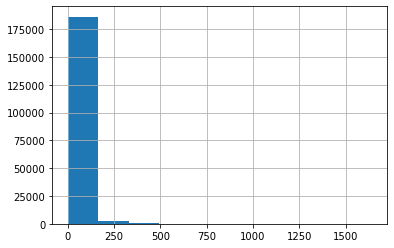

In [65]:
text_stats_df.cleaned_word_count.hist();

After cleaning text, some reviews now have 0 words.

In [66]:
text_stats_df[(text_stats_df.cleaned_word_count >= 10) & (text_stats_df.cleaned_word_count <= 100)]

,reviews,sentiment,word_count,review_len,cleaned_text,cleaned_word_count,cleaned_review_len
0,"Get the SportaPros instead. They look better,...",1,31,127,"[instead, look, well, wear, street, configurat...",10,61
1,I've been looking for a lighter alternative to...,1,263,1097,"[look, light, alternative, absolutely, perfect...",92,563
2,The finest headphones available. You can spend...,1,119,512,"[fine, headphone, available, spend, vast, amou...",48,287
3,3rd pair of these I've purchased. My wife has...,1,108,419,"[pair, purchase, wife, pair, pair, glove, box,...",36,195
4,My old Koss Porta Pros finally got beat to dea...,1,170,713,"[old, finally, get, beat, death, year, ago, la...",65,367
...,...,...,...,...,...,...,...
189476,Are these 5 star earbuds? I say yes! but you n...,1,246,903,"[star, earbud, need, know, criterion, small, e...",77,395
189478,Best sports headphones I've ever had. Great va...,1,48,194,"[good, sport, headphone, great, value, price, ...",17,103
189479,"If this earphones were wireless, they would be...",1,46,194,"[earphone, wireless, good, sound, quality, abi...",17,103
189480,"Amazing for the price. They passed my ""On My L...",1,137,535,"[amazing, price, pass, test, song, subpar, spe...",40,250


Outliers in text length can significantly affect the accuracy and reliability of sentiment analysis models. This is because longer texts may contain more nuanced and complex sentiments that are harder to detect automatically, while shorter texts may lack sufficient context and information for accurate sentiment analysis. Thus, including outliers in the analysis may lead to biased or noisy results that do not accurately reflect the overall sentiment of the dataset. I will choose to drop reviews with lower than 10 tokens and more than 200 tokens.

In [67]:
data_df = text_stats_df[(text_stats_df.cleaned_word_count >= 10) & (text_stats_df.cleaned_word_count <= 200)].copy()

In [68]:
data_df = data_df.reset_index(drop = True)

In [69]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133546 entries, 0 to 133545
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   reviews             133546 non-null  object
 1   sentiment           133546 non-null  int64 
 2   word_count          133546 non-null  int64 
 3   review_len          133546 non-null  int64 
 4   cleaned_text        133546 non-null  object
 5   cleaned_word_count  133546 non-null  int64 
 6   cleaned_review_len  133546 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 7.1+ MB


In [70]:
data_df.describe()

,sentiment,word_count,review_len,cleaned_word_count,cleaned_review_len
count,133546.000000,133546.000000,133546.000000,133546.000000,133546.000000
mean,0.766582,108.017238,421.973560,36.619127,203.925666
std,0.423007,97.712794,384.634014,31.455234,180.082586
min,0.000000,10.000000,46.000000,10.000000,34.000000
25%,1.000000,44.000000,172.000000,16.000000,87.000000
50%,1.000000,73.000000,283.000000,25.000000,139.000000
75%,1.000000,134.000000,520.000000,45.000000,250.000000
max,1.000000,841.000000,3646.000000,200.000000,1294.000000


<AxesSubplot:>

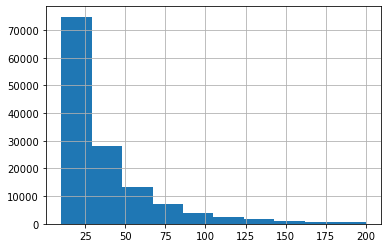

In [71]:
data_df.cleaned_word_count.hist()

In [72]:
data_df.sentiment.value_counts(normalize = True)

1    0.766582
0    0.233418
Name: sentiment, dtype: float64

### Word Frequency

Examining the most common unigrams, bigrams, and trigrams to find any words or phrases that may repeat across many documents.

In [73]:
# Create a dummy function to pass cleaned and tokenized text into count vectorizer
def dummy(doc):
    return doc

In [74]:
def top_words(text, n = None, ngram = (1,1)):
    # Function using count vectorizer to return top n frequent words
    cv = CountVectorizer(ngram_range = ngram, stop_words = None, tokenizer = dummy, preprocessor = dummy)
    words = cv.fit_transform(text)
    sum_words = words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    word_df = pd.DataFrame(word_freq, columns=['word', 'count'])
    return word_df[:n]

#### Unigrams 

Common words that my not add additional information: headphone, good, great, work, ear, use, like, love, well. I can try to filter them out during topic modeling stage.

In [75]:
top30 = top_words(text = data_df.cleaned_text, n = 30)

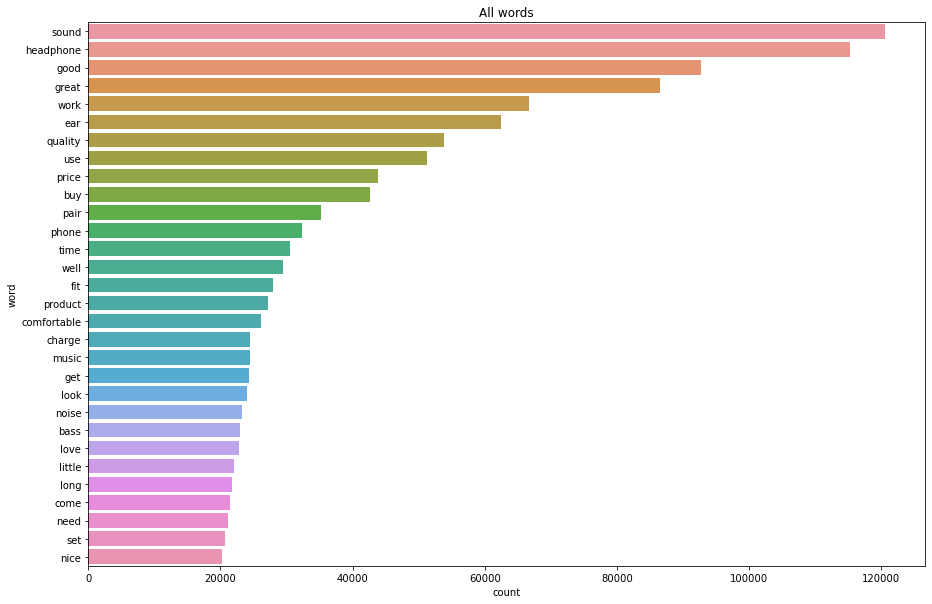

In [76]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(data = top30, x = 'count', y = 'word', orient = 'h', ax = axs)
axs.set_title('All words');

#### Bigrams

Common bigrams that may not add additional information: ear bud

In [77]:
top30_bigrams = top_words(text = data_df.cleaned_text, n = 30, ngram = (2,2))

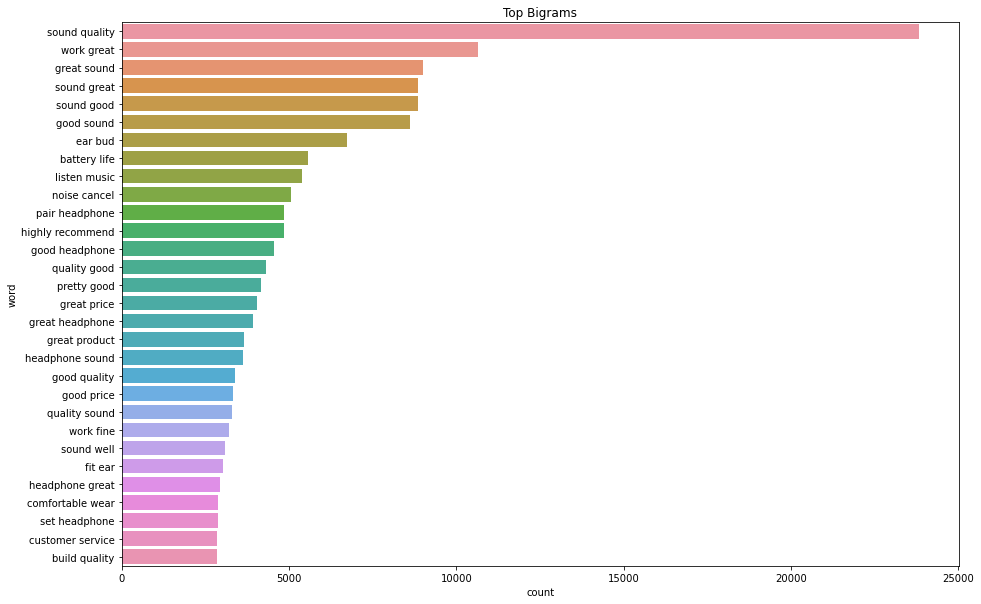

In [78]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(data = top30_bigrams, x = 'count', y = 'word', orient = 'h', ax = axs)
axs.set_title('Top Bigrams');

#### Trigrams

Trigrams do not seem to add any more information that is already given by unigrams and bigrams.

In [79]:
top30_trigrams = top_words(text = data_df.cleaned_text, n = 30, ngram = (3,3))

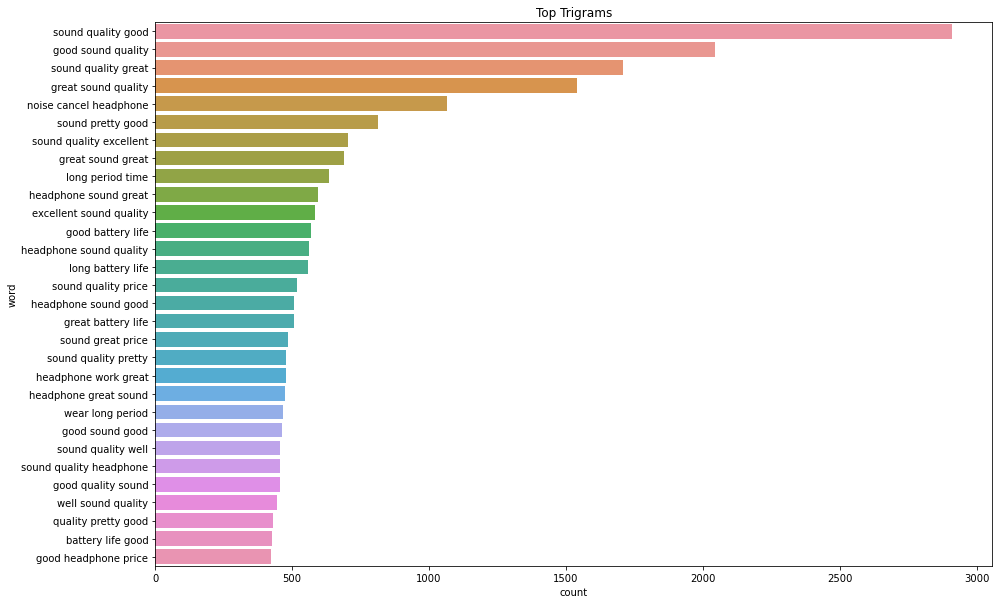

In [80]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(data = top30_trigrams, x = 'count', y = 'word', orient = 'h', ax = axs)
axs.set_title('Top Trigrams');

### Topic Modeling

Latent Dirichlet Allocation (LDA) is a popular topic modeling technique used to identify the underlying themes and topics in a large corpus of text data. LDA assumes that each document is a mixture of multiple topics and that each word in the document is associated with a particular topic. The model then attempts to identify the most likely topic distribution for each document and the most likely word distribution for each topic. I will be using Gensim's library to conduct LDA topic modeling.

In [495]:
#data_df.to_csv('data/processed_reviews.csv', index = False)

In [47]:
#data_df = pd.read_csv('data/processed_reviews.csv')

In [234]:
#processed_df = data_df[['reviews', 'cleaned_text', 'sentiment']].copy()

In [245]:
#processed_df.to_csv('data/processed_reviews.csv', index = False)

In [82]:
data_words = data_df.cleaned_text

In [83]:
# Create bigrams
bigram = Phrases(data_words, min_count=10, threshold=0.7)
bigram_phraser = Phraser(bigram)
bigram_docs = [bigram_phraser[doc] for doc in data_words]


In [95]:
# create unique id for each token
id2word = corpora.Dictionary(bigram_docs)

# filter out rare and frequent tokens
id2word.filter_extremes(no_below = 10, no_above = 0.7)

# Create Corpus
texts = bigram_docs

# Create bag of words for LDA input
corpus = [id2word.doc2bow(text) for text in texts]

# View, each tuple represents words unique id and how many times they appear in the review
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [148]:
# run LdaMulticore for faster computation time
lda_model = LdaMulticore(corpus=corpus,
                         id2word=id2word,
                         # start with a random number of topics
                         num_topics=6, 
                         random_state=100,
                         workers = 4,
                         chunksize=100,
                         passes=10,
                         alpha='symmetric')

In [132]:
lda_model.print_topics()

[(0,
  '0.016*"case" + 0.010*"phone" + 0.008*"cable" + 0.008*"look" + 0.007*"fit" + 0.007*"feel" + 0.007*"hold" + 0.006*"nice" + 0.006*"keyboard" + 0.006*"like"'),
 (1,
  '0.019*"work" + 0.016*"use" + 0.015*"device" + 0.013*"headset" + 0.012*"charge" + 0.010*"phone" + 0.008*"great" + 0.008*"time" + 0.008*"need" + 0.007*"battery"'),
 (2,
  '0.054*"headphone" + 0.032*"sound" + 0.020*"good" + 0.013*"bass" + 0.013*"great" + 0.012*"price" + 0.012*"quality" + 0.009*"music" + 0.009*"well" + 0.008*"sound_quality"'),
 (3,
  '0.024*"product" + 0.021*"great" + 0.020*"buy" + 0.020*"work" + 0.019*"love" + 0.012*"work_great" + 0.010*"purchase" + 0.010*"month" + 0.010*"good" + 0.010*"time"'),
 (4,
  '0.034*"headphone" + 0.022*"ear" + 0.018*"good" + 0.013*"great" + 0.013*"work" + 0.012*"earbud" + 0.011*"sound_quality" + 0.011*"sound" + 0.011*"pair" + 0.009*"fit"')]

Above results show a list of topics, where each topic is represented as a tuple of (topic number, list of key terms and their weights).

In [133]:
# inspect first review
data_df.reviews[0]

'Get the SportaPros instead.  They look better, can be worn in a street configuration, cost less, and sound exactly the same. Get the SportaPros Instead.'

In [134]:
# LDA output for first review
lda_model[corpus][0]

[(0, 0.01879576),
 (1, 0.018961908),
 (2, 0.41578618),
 (3, 0.018534387),
 (4, 0.5279218)]

According to our LDA model, the above text belongs to Topic 2 and 4. The article is 41% belonging to topic 2 and 52% belonging to topic 4. In order to evaulate our LDA model we can compute it's coherence score for reference.

In [149]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5193202496505367


Coherence metric is measure from 0 to 1, the higher the better. One way to determine optimal topic numbers would be to iterate over various topic numbers and compare their coherence score.

In [140]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, 
                             num_topics=num_topics, 
                             id2word=id2word, 
                             random_state=100,
                             workers = 4,
                             chunksize=100,
                             passes=10,
                             alpha='symmetric')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [141]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus, 
                                                        texts=texts, 
                                                        start=2, limit=26, step=3)

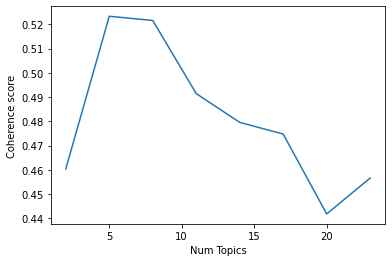

In [147]:
# plot of lda models by topic number and coherence score
limit=26; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score");

In [143]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4604
Num Topics = 5  has Coherence Value of 0.5234
Num Topics = 8  has Coherence Value of 0.5216
Num Topics = 11  has Coherence Value of 0.4914
Num Topics = 14  has Coherence Value of 0.4796
Num Topics = 17  has Coherence Value of 0.4747
Num Topics = 20  has Coherence Value of 0.4418
Num Topics = 23  has Coherence Value of 0.4566


LDA model with 5 topics is shown to havethe highest coherence score.

In [144]:
optimal_model = model_list[1]

pyLDAvis is an interactive visualization tool for exploring the topics learned by an LDA model. The visualizations generated by pyLDAvis can be used to gain insights into the topics and their relationships, as well as to evaluate the quality of the topics learned by the model.

In [151]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics = False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.216851 -0.221419       1        1  12.031277
1     -0.011809 -0.116164       2        1  14.236237
2     -0.039548  0.203236       3        1  22.828075
3     -0.053482  0.160003       4        1  13.277647
4      0.003827  0.078452       5        1  25.621540
5      0.317863 -0.104108       6        1  12.005224, topic_info=          Term          Freq         Total Category  logprob  loglift
33   headphone  88806.000000  88806.000000  Default  30.0000  30.0000
139    headset  19749.000000  19749.000000  Default  29.0000  29.0000
5        sound  41384.000000  41384.000000  Default  28.0000  28.0000
254       work  38697.000000  38697.000000  Default  27.0000  27.0000
25         ear  25169.000000  25169.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
238       want   1737.248681  11824.451077   Topic6  -5.5757   0.2020
268       need   1562.054538  14409.314361   Topic6  -5.6820  -0.1020
210    provide   1386.144126   3390.564156   Topic6  -5.8015   1.2254
223       come   1457.516085  14298.772541   Topic6  -5.7513  -0.1636
914       give   1401.354781   4857.300644   Topic6  -5.7906   0.8768

[416 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
6946      5  0.121546     accessory
6946      6  0.877341     accessory
3522      5  0.998371  active_noise
2045      2  0.999291       adapter
12        2  0.002515       amazing
...     ...       ...           ...
68        4  0.596363          year
68        5  0.225368          year
68        6  0.025003          year
2164      4  0.768144      year_old
2164      5  0.231700      year_old

[748 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

In [145]:
# sort_topics set to False in order to keep topic numbering similar to LDA output.
# Visualization will start index at 1, where as LDA output will start topic index at 0.
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word, sort_topics = False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.278519  0.017776       1        1  15.825743
1      0.042444  0.197317       2        1  18.357450
2     -0.049830 -0.195047       3        1  23.567506
3     -0.233906  0.120966       4        1  14.032884
4     -0.037227 -0.141012       5        1  28.216417, topic_info=          Term          Freq         Total Category  logprob  loglift
33   headphone  84079.000000  84079.000000  Default  30.0000  30.0000
5        sound  42460.000000  42460.000000  Default  29.0000  29.0000
25         ear  23952.000000  23952.000000  Default  28.0000  28.0000
629    product  15878.000000  15878.000000  Default  27.0000  27.0000
254       work  38412.000000  38412.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
159        try   6423.817334  15313.826122   Topic5  -5.1226   0.3965
55     quality   6868.894739  18590.485257   Topic5  -5.0556   0.2696
187       time   6280.058388  19265.241079   Topic5  -5.1452   0.1443
16         buy   6492.071392  23621.055308   Topic5  -5.1120  -0.0263
8         well   6046.128786  18432.166190   Topic5  -5.1832   0.1506

[362 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
6719      4  0.998902        adhesive
12        1  0.011942         amazing
12        3  0.699332         amazing
12        4  0.134879         amazing
12        5  0.153670         amazing
...     ...       ...             ...
2084      2  0.999679  work_perfectly
2574      5  0.999536         workout
68        3  0.145860            year
68        4  0.583777            year
68        5  0.270280            year

[601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

Topic 1: Design
Topic 2: Battery / Connectivity
Topic 3: Sound Quality
Topic 4: Customer Service
Topic 5: Comfort

In [117]:
dominant_topics = []
for i in range(len(corpus)):
    topic_weights = lda_model[corpus[i]]
    dominant_topic = max(topic_weights, key=lambda x: x[1])
    dominant_topics.append(dominant_topic[0])    

In [118]:
data_df['dominant_topic'] = dominant_topics

In [119]:
data_df.head()

,reviews,sentiment,word_count,review_len,cleaned_text,cleaned_word_count,cleaned_review_len,dominant_topic
0,"Get the SportaPros instead. They look better,...",1,31,127,"[instead, look, well, wear, street, configurat...",10,61,4
1,I've been looking for a lighter alternative to...,1,263,1097,"[look, light, alternative, absolutely, perfect...",92,563,2
2,The finest headphones available. You can spend...,1,119,512,"[fine, headphone, available, spend, vast, amou...",48,287,2
3,3rd pair of these I've purchased. My wife has...,1,108,419,"[pair, purchase, wife, pair, pair, glove, box,...",36,195,3
4,My old Koss Porta Pros finally got beat to dea...,1,170,713,"[old, finally, get, beat, death, year, ago, la...",65,367,4


In [121]:
data_df.dominant_topic.value_counts(normalize = True)

4    0.340235
2    0.258810
1    0.177250
3    0.117944
0    0.105761
Name: dominant_topic, dtype: float64

In [124]:
data_df.drop(columns = ['word_count', 'review_len', 'cleaned_word_count', 'cleaned_review_len'], inplace = True)

In [125]:
data_df.head()

,reviews,sentiment,cleaned_text,dominant_topic
0,"Get the SportaPros instead. They look better,...",1,"[instead, look, well, wear, street, configurat...",4
1,I've been looking for a lighter alternative to...,1,"[look, light, alternative, absolutely, perfect...",2
2,The finest headphones available. You can spend...,1,"[fine, headphone, available, spend, vast, amou...",2
3,3rd pair of these I've purchased. My wife has...,1,"[pair, purchase, wife, pair, pair, glove, box,...",3
4,My old Koss Porta Pros finally got beat to dea...,1,"[old, finally, get, beat, death, year, ago, la...",4


In [126]:
data_df.to_csv('data/processed_reviews.csv', index = False)